# Breast Cancer SVM Classification

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# Add as needed

In [4]:
# Setting the sames of the columns
c = ['menopaus','agegrp', 'density', 'race', 'Hispanic','bmi', 'agefirst', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive', 'cancer', 'training', 'count']
# Loading in the data. We use an fwf because it is a text file
bc = pd.read_fwf('risk_rand.txt', delimiter = ' ', names = c)

In [5]:
bc.head()

,menopaus,agegrp,density,race,Hispanic,bmi,agefirst,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,training,count
0,0,1,1,1,0,1,0,0,0,0,9,9,0,0,1,3
1,0,1,1,1,0,1,0,0,0,9,9,9,0,0,0,2
2,0,1,1,1,0,1,0,0,0,9,9,9,0,0,1,3
3,0,1,1,1,0,1,1,0,0,0,9,9,0,0,1,1
4,0,1,1,1,0,1,1,0,1,9,9,9,0,0,1,1


In [6]:
bc.isnull().sum() # None of the values are NA, so it was already cleaned

menopaus    0
agegrp      0
density     0
race        0
Hispanic    0
bmi         0
agefirst    0
nrelbc      0
brstproc    0
lastmamm    0
surgmeno    0
hrt         0
invasive    0
cancer      0
training    0
count       0
dtype: int64

In [7]:
bc.info() # Checking the types of the data and how many entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181903 entries, 0 to 181902
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   menopaus  181903 non-null  int64
 1   agegrp    181903 non-null  int64
 2   density   181903 non-null  int64
 3   race      181903 non-null  int64
 4   Hispanic  181903 non-null  int64
 5   bmi       181903 non-null  int64
 6   agefirst  181903 non-null  int64
 7   nrelbc    181903 non-null  int64
 8   brstproc  181903 non-null  int64
 9   lastmamm  181903 non-null  int64
 10  surgmeno  181903 non-null  int64
 11  hrt       181903 non-null  int64
 12  invasive  181903 non-null  int64
 13  cancer    181903 non-null  int64
 14  training  181903 non-null  int64
 15  count     181903 non-null  int64
dtypes: int64(16)
memory usage: 22.2 MB


<Axes: >

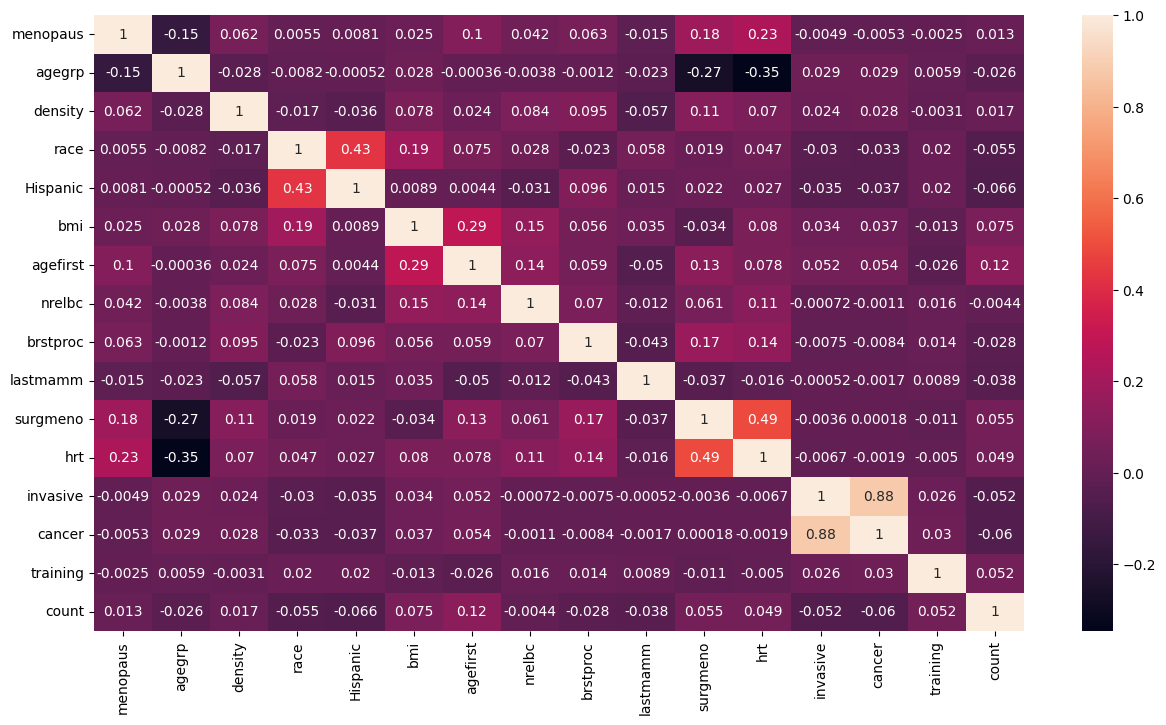

In [8]:
# Making a heatmap to check the correlations between variables.
plt.figure(figsize = (15,8) )
sns.heatmap(bc.corr(), annot=True)

Text(0.5, 1.0, 'Age Distribution')

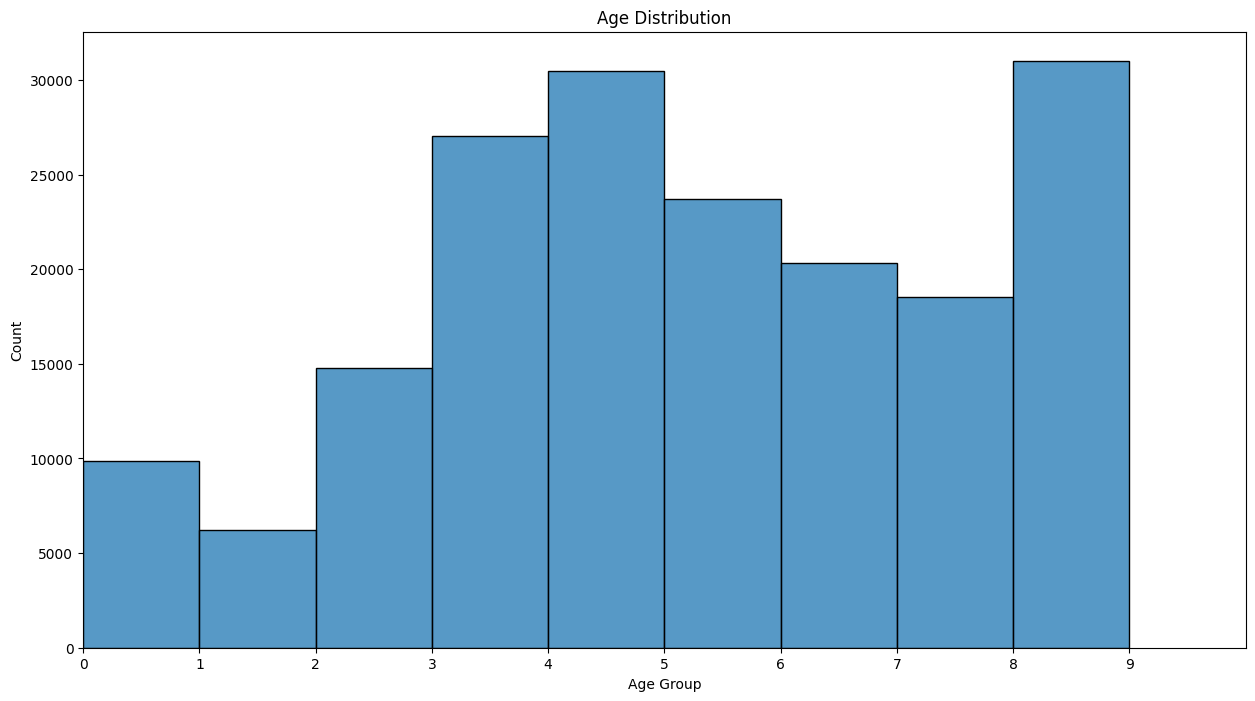

In [9]:
plt.figure(figsize = (15,8) )
# Creating a histogram to see the distribution of the people in each age group
sns.histplot(bc['agegrp'],binwidth = 1)
plt.xlabel('Age Group')
plt.xlim(0,10)
plt.xticks(range(0,10))
plt.ylabel('Count')
plt.title('Age Distribution')

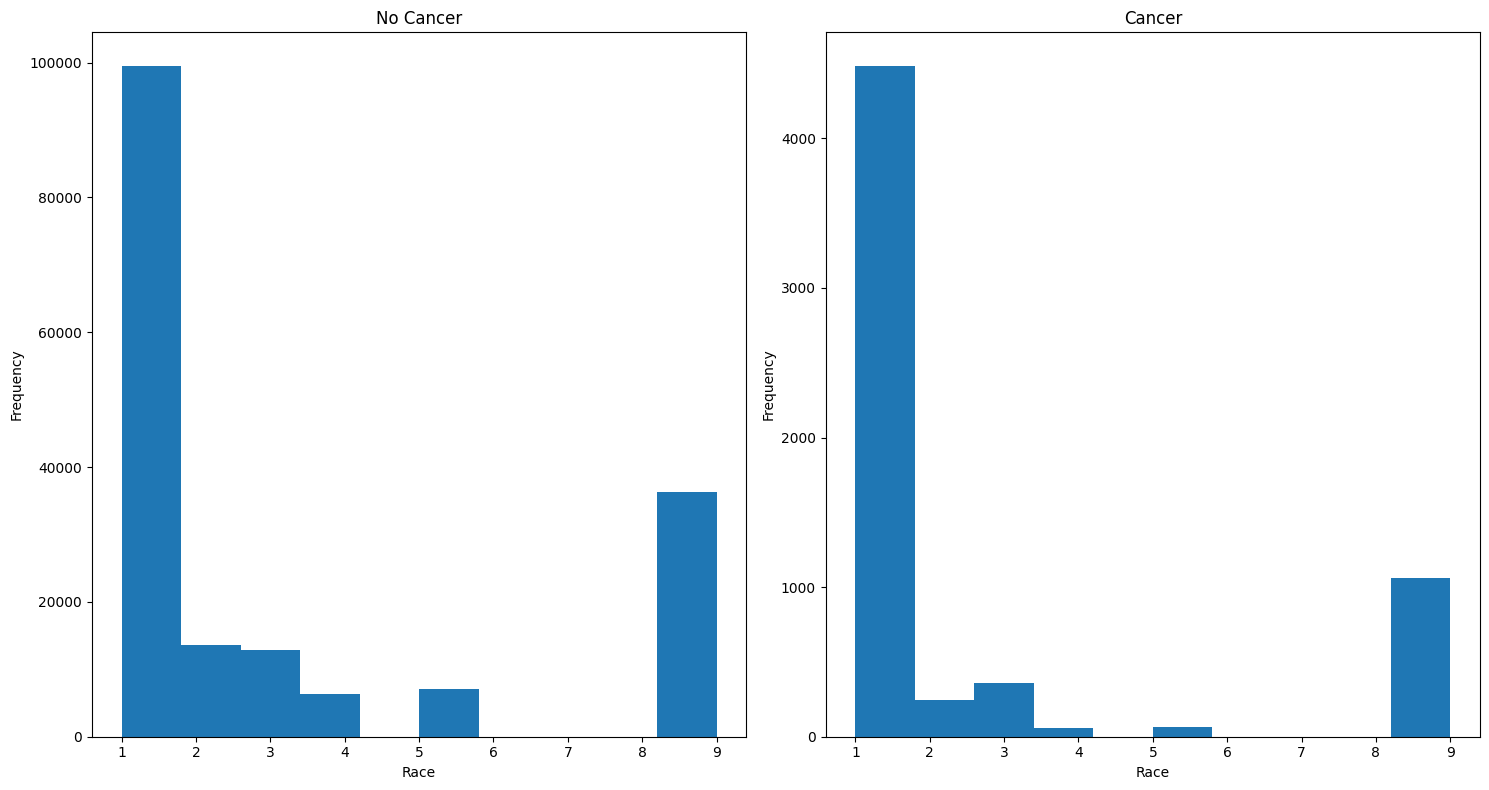

In [10]:
# Masking the data into those without cancer and those with cancer so we can see variable associations within those groups
Cancer0 = bc[bc['cancer'] == 0]
Cancer1 = bc[bc['cancer'] == 1]

# Creating histograms to check association between race and cancer frequency
# The reason it to check if genetics influences susceptibility to breast cancer
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.hist(Cancer0['race']);
plt.title('No Cancer')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(Cancer1['race']);
plt.title('Cancer')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.tight_layout()

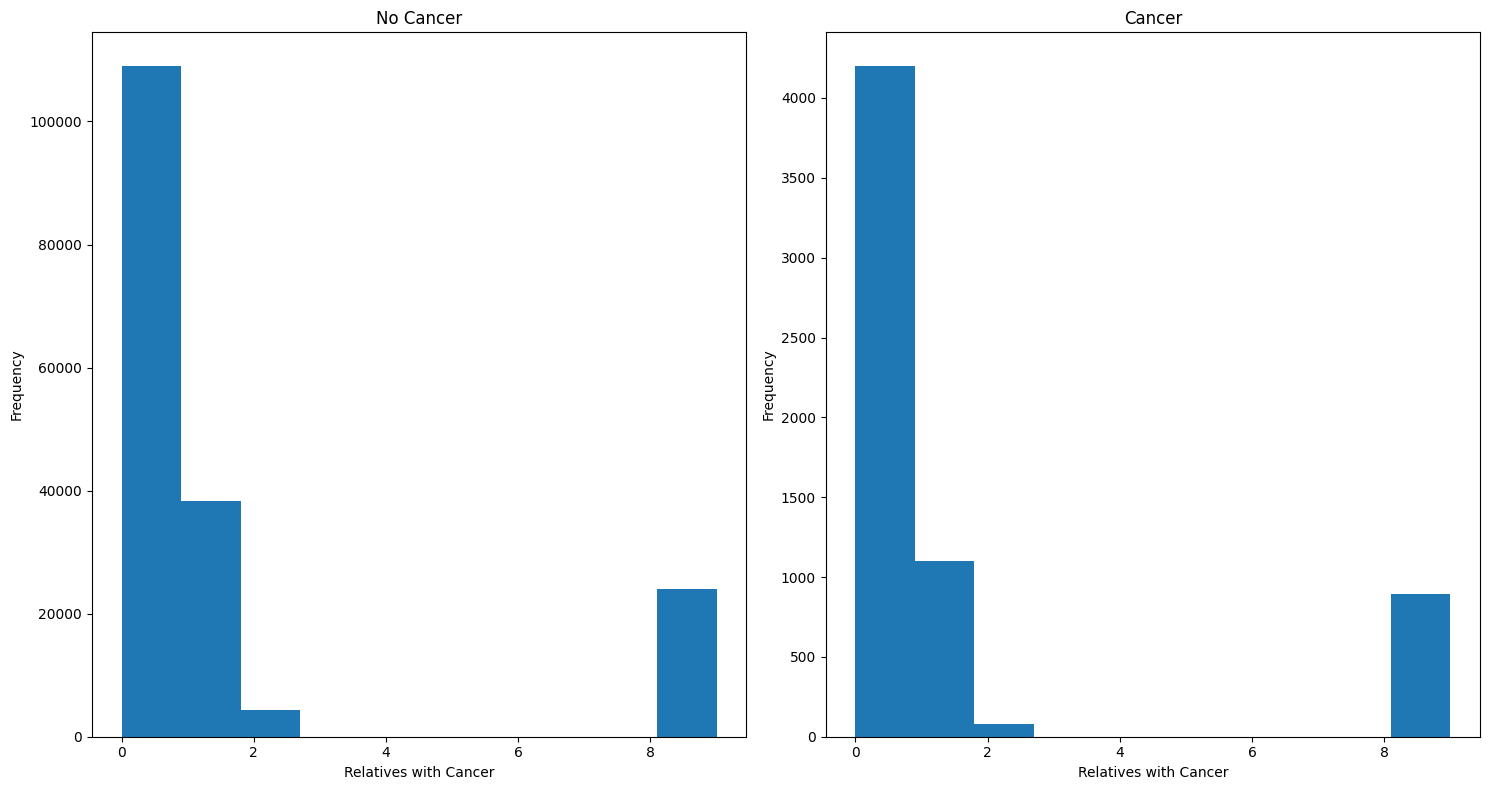

In [11]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
# Histogram to check association between relatives with cancer and if the person gets cancer
# Does having family members who have had cancer indicate a greater susceptibility to cancer
plt.hist(Cancer0['nrelbc']);
plt.title('No Cancer')
plt.xlabel('Relatives with Cancer')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(Cancer1['nrelbc']);
plt.title('Cancer')
plt.xlabel('Relatives with Cancer')
plt.ylabel('Frequency')
plt.tight_layout()

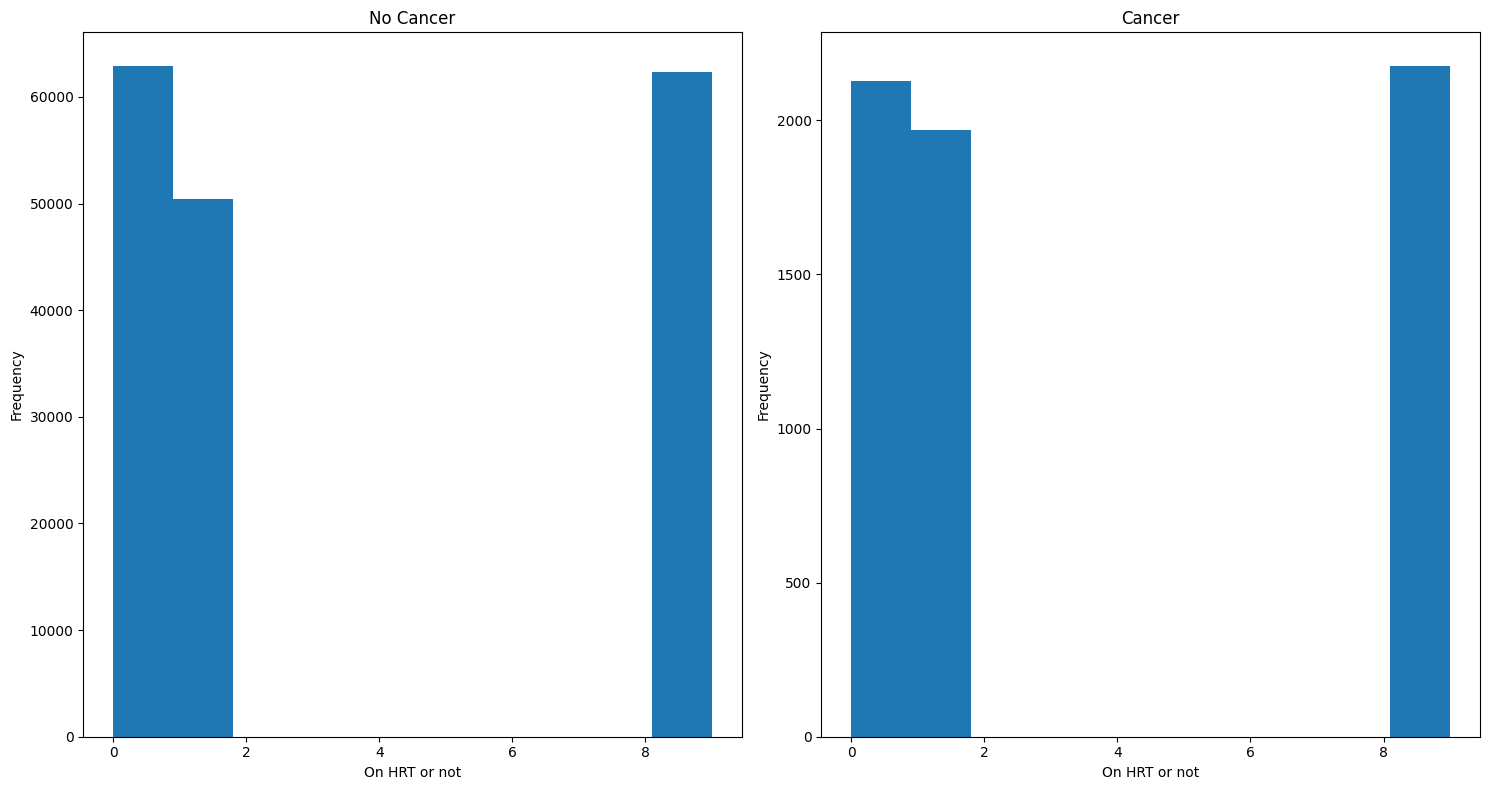

In [12]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
# Checking relation between those on hormone therapy and cancer
plt.hist(Cancer0['hrt']);
plt.title('No Cancer')
plt.xlabel('On HRT or not')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.hist(Cancer1['hrt']);
plt.title('Cancer')
plt.xlabel('On HRT or not')
plt.ylabel('Frequency')
plt.tight_layout()

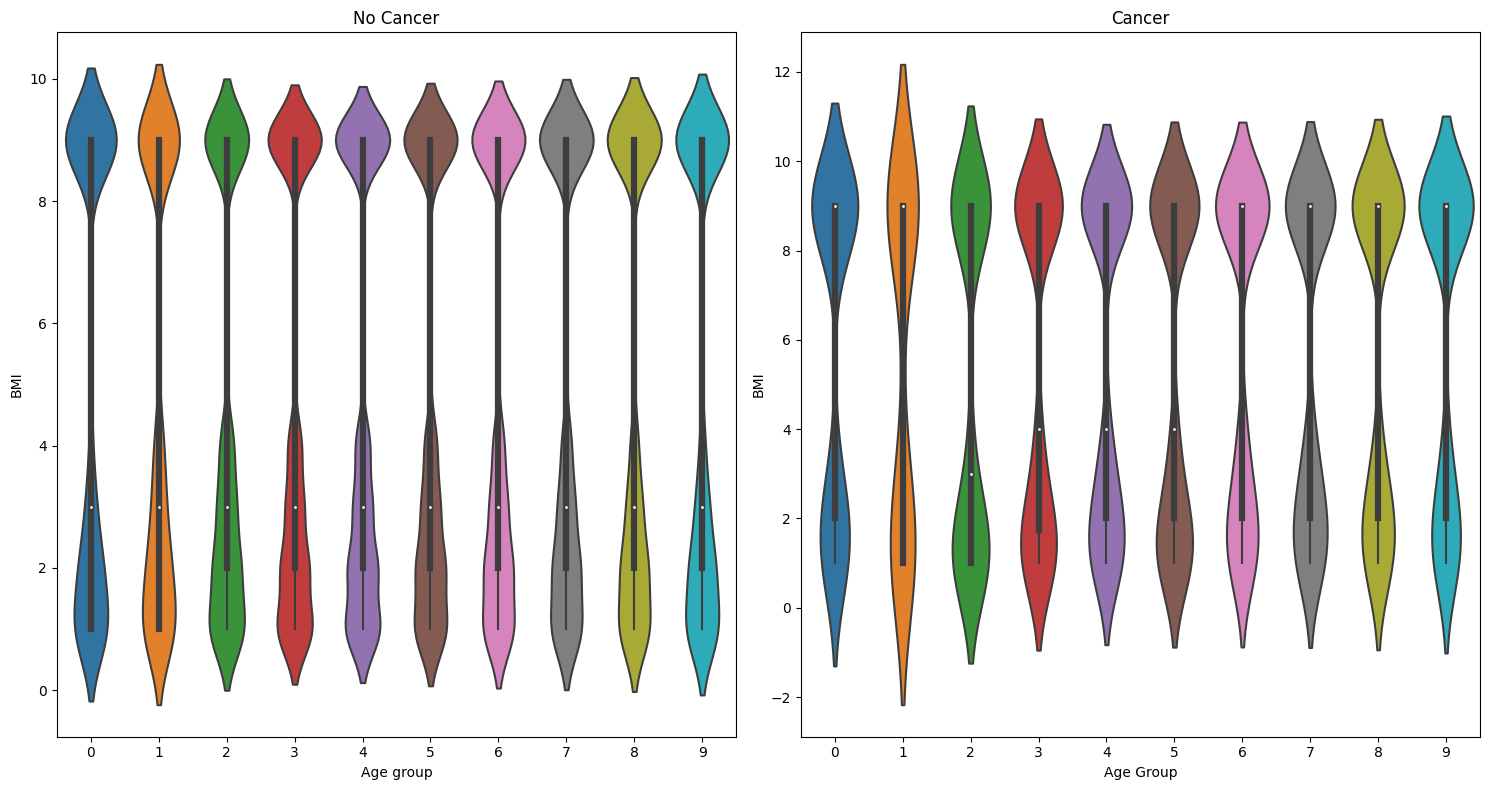

In [13]:
# This violin plot checks the freguency of people of a certain BMI at each age group to see the distribution of our data
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.violinplot(x = 'agegrp', y = 'bmi', data = Cancer0) # Distribution of those without cancer
plt.title('No Cancer')
plt.xlabel('Age group')
plt.ylabel('BMI')
plt.subplot(1,2,2)
sns.violinplot(x = 'agegrp', y = 'bmi', data = Cancer1) # Distribution of those with cancer
plt.title('Cancer')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.tight_layout()

In [14]:
bc.columns

Index(['menopaus', 'agegrp', 'density', 'race', 'Hispanic', 'bmi', 'agefirst',
       'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive',
       'cancer', 'training', 'count'],
      dtype='object')

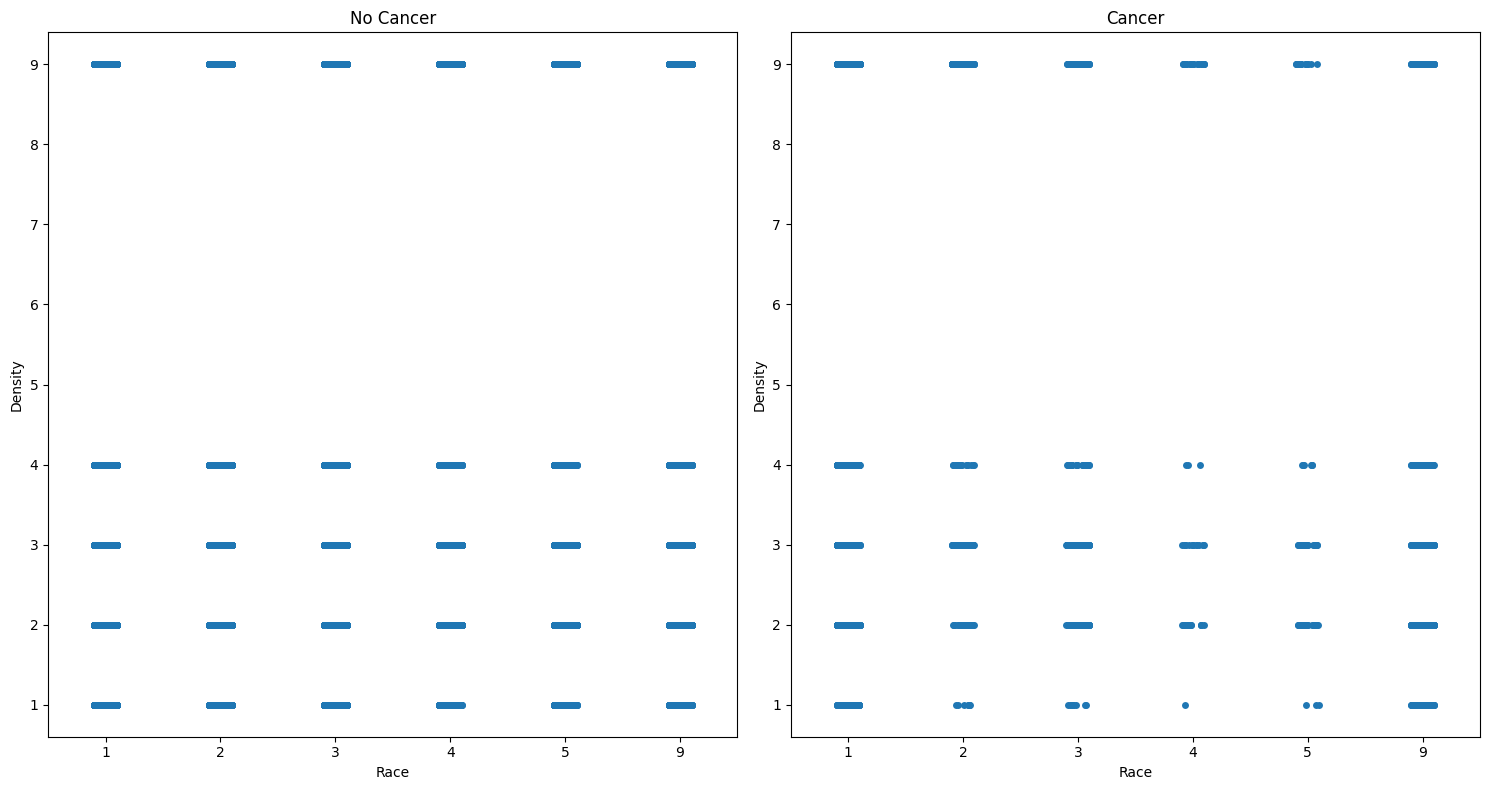

In [15]:
# Strip plot is a good plot to complete the violin plot. It provides more information on where the data is, especially it is discrete.
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
# Checking for those without cancer
sns.stripplot(x = 'race', y = 'density', data = Cancer0, jitter = True)
plt.xlabel('Race')
plt.ylabel('Density')
plt.title('No Cancer')
# Checking for those with cancer
plt.subplot(1,2,2)
sns.stripplot(x = 'race', y = 'density', data = Cancer1, jitter = True)
plt.xlabel('Race')
plt.ylabel('Density')
plt.title('Cancer')
plt.tight_layout()

# Linear Regression 

In [16]:
# Want to see how linear regression will do in finding an associatio between breast cancer and certain variables
# Here we check the invasive column (Diagnosis of cancer within one year of mammogram)
x = bc['invasive'].values
y = bc['cancer'].values

x_with_cnst = sm.add_constant(x)
model = sm.OLS(y, x_with_cnst)
results = model.fit()
print("Intercept and slope are:", results.params)


Intercept and slope are: [0.00769531 0.99230469]


In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 6.334e+05
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:38:30   Log-Likelihood:             1.8776e+05
No. Observations:              181903   AIC:                        -3.755e+05
Df Residuals:                  181901   BIC:                        -3.755e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.000     37.558      0.0

# Multiple Regression

In [18]:
# This is is a multiple regression with all variables except for count and training against cancer. We want to see how much each variable affects a cancer diagnosis.
Multiple = bc.drop(['count','training' ], axis = 1)
X = Multiple.drop(['cancer'], axis = 1)


Y = Multiple['cancer']

model2 = sm.OLS(Y, X)
results2 = model2.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 cancer   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                          5.104e+04
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                        0.00
Time:                        21:38:30   Log-Likelihood:                      1.8787e+05
No. Observations:              181903   AIC:                                 -3.757e+05
Df Residuals:                  181890   BIC:                                 -3.756e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

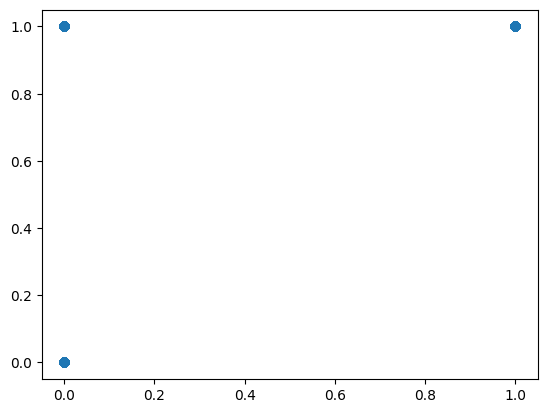

In [19]:
plt.scatter(bc['invasive'], bc['cancer'])
# This plot is not great due to its discrete nature. Essentially it is a scatter plot of invasive and cancer

# SVM (Support Vector Machine)

In [20]:
# Supervised SVM 

# Getting rid of the columns that have likely no effect on whether someone has cancer or not.
bc_svm = bc.drop(['count','training' ], axis = 1)

# X is a dataframe of all the features (independent variables)
# The dependent variable is dropped
X = bc_svm.drop(['cancer'], axis = 1)
# Y is the dataframe of the dependent variable
Y = bc_svm['cancer']

# Splitting the data into train and test features and labels respectively
# Proportion of data set to testing data is 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Now we initialize a variable that is the SVM linear classifier model
clf = svm.SVC(kernel = 'linear')
# Now we fit the SVM to the training set
clf.fit(X_train, Y_train)

# Now we want our svm to predict whether or not someone has breast cancer from our testing data, using our trained SVM
Y_pred = clf.predict(X_test)

# Checking to see how our SVM measured up against the True data
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))



Accuracy: 0.9927434649954646


## K-fold cross validation for SVM (Support Vector Machine)

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# define the number of folds
num_folds = 10

# define the number of splits
num_splits = 10

# create a kfold object
kf = KFold(n_splits = num_splits, shuffle = True)

# initialize a list to store the accuracy values for each fold
accuracy_list = []

# loop through each fold
for train_index, test_index in kf.split(X):
    # get the training data for each fold
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    
    # get the testing data for each fold
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]
    
    # initialize a SVM model
    clf = svm.SVC(kernel = 'linear')
    
    # fit the model to the training data
    clf.fit(X_train, Y_train)
    
    # get the predictions for the testing data
    Y_pred = clf.predict(X_test)
    
    # get the accuracy score for the predictions
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # append the accuracy score to the list
    accuracy_list.append(accuracy)

# print the list of accuracy scores
print(accuracy_list)

# print the average accuracy score over all the folds
print(np.mean(accuracy_list))

[0.9927986366884723, 0.9929635534055302, 0.9932384146006267, 0.9923584387025839, 0.9929631665750412, 0.9922484881803189, 0.9925233644859813, 0.9919736118746564, 0.9923584387025839, 0.9916987355689939]
0.9925124848784789


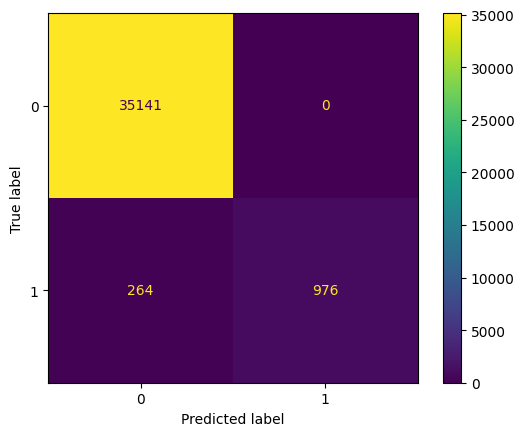

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
# Now we can see the True Positives, False Positives, True Negatives, and False Negatives.
# Top right (True Negatives), Top left (False Negative), Bottom Right (False Positive), Bottom Left (True Positive)

In [42]:
# Printing the confusion matrix without the visualization
print(cm)

[[35141     0]
 [  264   976]]


In [43]:
# Supervised svm

# Here we decide to see if another SVM model is better, so we choose rbf
clf1 = svm.SVC(kernel = 'rbf')

# Fitting the SVM to the data
clf1.fit(X_train, Y_train)

# Predicting whether or not someone has cancer using the rbf model on the test features
Y_pred1 = clf1.predict(X_test)

# Checking the accuracy of our new predictions with the true values
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred1))


Accuracy: 0.9927434649954646


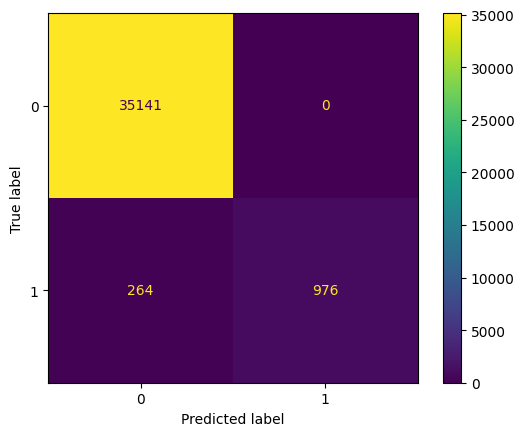

In [44]:
# Confusion Matrix
cm1 = confusion_matrix(Y_test, Y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf1.classes_)
disp.plot()
# The outputs are identical to the ones above, likely because the rbf reduced to a linear classifier since that was sufficient.

In [45]:
# Model performance summary

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred1))



              precision    recall  f1-score   support

           0       0.99      1.00      1.00     35141
           1       1.00      0.79      0.88      1240

    accuracy                           0.99     36381
   macro avg       1.00      0.89      0.94     36381
weighted avg       0.99      0.99      0.99     36381



For both the kernels (rbf and linear) the svm tends to have a similar performance. The following things can be done to improve the SVM performance:

1. Using feature engineering to select or create more appropriate features that better help capture the underlying patterns
2. Use cross validation for finding optimal hyperparameters

# Logistic Regression #

In [46]:
from sklearn.linear_model import LogisticRegression
# Here we want to see how a logistic regression fits our data
classifier = LogisticRegression(random_state = 0)
# Fitting our initialized regression to our training data
classifier.fit(X_train, Y_train)



LogisticRegression(random_state=0)

In [47]:
# Predicting the outcomes using our testing data using the logistic regression
Y_pred = classifier.predict(X_test)
Y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

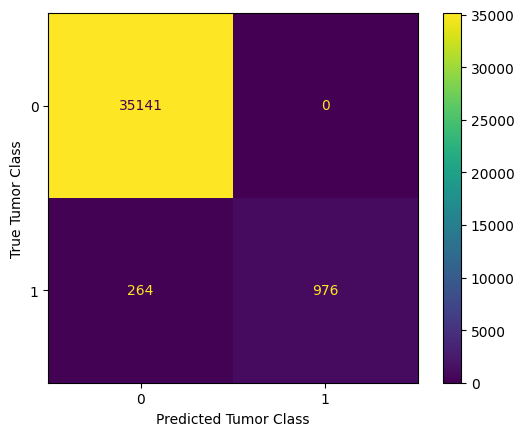

In [53]:
# Confusion matrix
cm2 = confusion_matrix(Y_test, Y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=classifier.classes_)
disp.plot()
plt.xlabel("Predicted Tumor Class")
plt.ylabel("True Tumor Class")
plt.show()
# Here, it shows that our logistic regression model also has an exact same confusion matrix as the SVMs

In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
# The accuracy of the logistic regression is just barely under that of the SVM's. Likely due to machine error.

Accuracy: 99.25 %
Standard Deviation: 0.07 %
